## PyTorch MNIST tutorial

Let's train a model on MNIST handwritten digit dataset.

In [1]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
import torch.nn as nn
import torch
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

First we need to prepare our training and testing data. Training(Testing) data are sometimes not formatted well, you might need to do some data pre-processing. Here we simply download the dataset that is well-formatted.

In [2]:
from torchvision import datasets, transforms

# Transform PIL image to Tensor 
# It includes normalization pixel value to range of [0, 1]
transform = transforms.Compose([transforms.ToTensor()])

# MNIST dataset
train_dataset = datasets.MNIST(root="./", train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./', train=False, transform=transform, download=True)

Take a look at the first image (id = 0)

In [3]:
sample_img, sample_label = train_dataset[0]
print(sample_img.size())
print(sample_label)

torch.Size([1, 28, 28])
tensor(5)


Visualize this sample image.

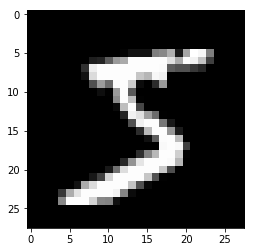

In [4]:
plt.imshow(sample_img.squeeze(0).numpy() * 255, cmap='gray')

Then we need a dataloader that we iterately access our data.
 
`DataLoader` handles the data in each iterations during training.

You can set `batch_size`, `shuffle`

In [5]:
# load the dataset into dataloader
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=16,
                          shuffle=True)
test_loader = DataLoader(dataset=test_dataset,
                         batch_size=16,
                         shuffle=False)

Of course, you still can modify how it access data by replace the `collate_fn` parameter.

For more infomation: https://pytorch.org/tutorials/beginner/data_loading_tutorial.html

### Build Model

As the dataset is ready, we are ready for building our model.

This is a simple fully-connected model.

It is better to modualize all your models if the structure gets more complicated.

In [6]:
# define our model
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, 64),
            nn.ReLU(inplace=True),
            nn.Linear(64, 10),
        )
        self.output = nn.Softmax(dim=1)
    
    def forward(self, x):
        # You can modify your model connection whatever you like
        out = self.fc(x.view(-1, 28*28))
        out = self.output(out)
        return out

### Start Training

Cuda configurations: set to cuda if you have a GPU device.

In [8]:
device = torch.device('cuda')     
# device = torch.device('cpu') for cpu

Set up: our model, optimizer, and loss function

In [9]:
model = Model()
model.to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
loss_fn = nn.CrossEntropyLoss()

Start training!

In [10]:
# start training
model.train()

for epoch in range(10):
    train_loss = []
    train_acc = []
    for _, (img, target) in enumerate(train_loader):
        img_cuda = img.to(device)
        target_cuda = target.to(device)
        
        # You can also use
        # img_cuda = img.cuda()
        # target_cuda = target.cuda()
        
        
        optimizer.zero_grad()
        
        output = model(img_cuda)
        loss = loss_fn(output, target_cuda)
        loss.backward()
        optimizer.step()
        
        predict = torch.max(output, 1)[1]
        acc = np.mean((target_cuda == predict).numpy())
        
        train_acc.append(acc)
        train_loss.append(loss.item())
        
    print("Epoch: {}, Loss: {:.4f}, Acc: {:.4f}".format(epoch + 1, np.mean(train_loss), np.mean(train_acc)))

Epoch: 1, Loss: 1.6988, Acc: 0.8141
Epoch: 2, Loss: 1.5633, Acc: 0.9122
Epoch: 3, Loss: 1.5482, Acc: 0.9226
Epoch: 4, Loss: 1.5393, Acc: 0.9292
Epoch: 5, Loss: 1.5324, Acc: 0.9353
Epoch: 6, Loss: 1.5269, Acc: 0.9400
Epoch: 7, Loss: 1.5222, Acc: 0.9440
Epoch: 8, Loss: 1.5179, Acc: 0.9484
Epoch: 9, Loss: 1.5142, Acc: 0.9516
Epoch: 10, Loss: 1.5109, Acc: 0.9545


Done! That is all for training.